Import statements

In [229]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder

Data upload

In [230]:
df = pd.read_csv('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/NHS_WWL_Dataset/wwlLancMsc_data.csv', low_memory=False)

In [231]:
df["spell_episode_los"].value_counts()

spell_episode_los
0      28300
1       3919
2       2428
3       1707
4       1128
       ...  
86         1
72         1
62         1
109        1
65         1
Name: count, Length: 85, dtype: int64

Exploratory Data Analysis (EDA) - entire dataset

1. Statistical Summary

In [232]:
df_desc = df.describe()
# Saves output to csv file
# df_desc.to_csv('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/Descriptive_stats.csv')

print(df_desc)

       specialty_spec_code  duration_elective_wait  patient_age_on_admission  \
count         41846.000000            17295.000000              41846.000000   
mean            244.584668              105.389303                 56.907470   
std             118.221109              172.722877                 23.284725   
min             100.000000                0.000000                  1.000000   
25%             110.000000               18.000000                 41.000000   
50%             300.000000               49.000000                 62.000000   
75%             301.000000              132.000000                 75.000000   
max             560.000000             3415.000000                104.000000   

       patient_age_on_discharge  spell_episode_los  \
count              41846.000000       41846.000000   
mean                  56.912274           1.759427   
std                   23.287412           5.281628   
min                    1.000000           0.000000   
25%      

2. Data Types (Summary)

In [233]:
d_types = df.dtypes

# d_types.to_csv('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/Data Types.csv')


print(d_types)

site_national_code          object
site_description            object
site_local_code             object
Admission_Date              object
admission_date_dt           object
                            ...   
attend_dis_description      object
ae_unplanned_attendance    float64
location                    object
ID                           int64
Deprivation Decile           int64
Length: 101, dtype: object


Data Types (Counts)

In [234]:
df_dtype_counts = df.dtypes.value_counts()
# df_dtype_counts.to_csv('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/DType Counts.csv')
print(df_dtype_counts)

int64      48
object     45
float64     8
Name: count, dtype: int64


3. Variance & Standard Deviation

In [235]:
numeric_df = df.select_dtypes(include=["int64", "float64"])
# Descriptive statistics for numeric outputs:
df_numeric_stats = pd.DataFrame({
    "Variance": numeric_df.var(),
    "Standard Deviation": numeric_df.std()
})
# df_numeric_stats.to_csv('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/Outputs/Numeric_DescriptiveStats.csv')
print(df_numeric_stats)

                                                   Variance  \
specialty_spec_code                            1.397623e+04   
duration_elective_wait                         2.983319e+04   
patient_age_on_admission                       5.421784e+02   
patient_age_on_discharge                       5.423036e+02   
spell_episode_los                              2.789559e+01   
discharge_delay_reason_national_code                    NaN   
delayed_discharges_flag                        4.779315e-05   
delayed_discharges_no_of_days                  4.898867e-03   
readmission_flag_28_days                       1.557506e-01   
readmission_flag_30_days                       1.591962e-01   
social_worker_date_time_referred                        NaN   
discharge_letter_sent_in_24hrs                 7.926669e-02   
inpatient_death_flag                           1.236560e-02   
spell_days_elective                            1.237809e+00   
spell_days_non_elective                        3.156609

4. Duplicate Rows

In [236]:
df[df.duplicated()]

,site_national_code,site_description,site_local_code,Admission_Date,admission_date_dt,discharge_date_dt,specialty_local_code,specialty_spec_code,specialty_spec_desc,ward_code_admission,...,source_of_ref_description,presenting_complaint,acuity_code,inj_or_ail,NEWS2,attend_dis_description,ae_unplanned_attendance,location,ID,Deprivation Decile


No duplicate rows detected in the dataset

---

_Exploratory Data Analysis (Column 21 - 40)_

Segmented Data

In [237]:
df_21to40 = df.iloc[:,20:40]

1. Descriptive Statistics

In [238]:
df_21to40.describe()

,discharge_delay_reason_national_code,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,social_worker_date_time_referred,discharge_letter_sent_in_24hrs,inpatient_death_flag,spell_days_elective,spell_days_non_elective,sex_national_code
count,0.0,41846.000000,41846.000000,41846.000000,41846.000000,0.0,24563.000000,41846.000000,41846.000000,41846.000000,41846.000000
mean,NaN,0.000048,0.000406,0.192993,0.198657,NaN,0.913203,0.012522,0.193256,1.684366,1.539884
std,NaN,0.006913,0.069992,0.394653,0.398994,NaN,0.281543,0.111201,1.112569,5.618371,0.502424
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,2.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,2.000000
max,NaN,1.000000,14.000000,1.000000,1.000000,NaN,1.000000,1.000000,42.000000,126.000000,9.000000


- Mode Calculation

In [239]:
df_21to40.mode(dropna=False)

,discharge_delay_reason_national_code,discharge_delay_reason_description,spell_dominant_proc,spell_primary_diagnosis,spell_secondary_diagnosis,specialty_division,specialty_directorate,hrg_group,hrg_sub_group,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,social_worker_date_time_referred,discharge_letter_sent,discharge_letter_sent_in_24hrs,inpatient_death_flag,spell_days_elective,spell_days_non_elective,sex_national_code
0,NaN,DW Generated,Record not grouped,Record not grouped,Record not grouped,Medicine,Medicine,Digestive System,Record not grouped,0,0,0,0,NaN,NaN,1.0,0,0,0,2


* Value Counts (Column 21 - 40)

In [240]:
for col in df_21to40.columns:
    print(f"{df_21to40.loc[:,col].value_counts()}\n")

Series([], Name: count, dtype: int64)

discharge_delay_reason_description
DW Generated           41844
OTHER                      1
EQUIPMENT - PATIENT        1
Name: count, dtype: int64

spell_dominant_proc
Record not grouped    17781
X292                   1712
G451                   1490
H229                    951
H221                    737
                      ...  
P189                      1
T728+HAND                 1
W087+FOOT                 1
W778+FOOT                 1
A088                      1
Name: count, Length: 1461, dtype: int64

spell_primary_diagnosis
Record not grouped    1774
M169                   918
D509                   745
M179                   670
Z380                   658
                      ... 
M0095                    1
M4850                    1
G08X                     1
S0200                    1
I609                     1
Name: count, Length: 2602, dtype: int64

spell_secondary_diagnosis
Record not grouped    4983
I10X                  1706
Z

* Null Value Count

In [241]:
print(df_21to40.isnull().sum())

discharge_delay_reason_national_code    41846
discharge_delay_reason_description          0
spell_dominant_proc                         0
spell_primary_diagnosis                     0
spell_secondary_diagnosis                   0
specialty_division                          0
specialty_directorate                       0
hrg_group                                   0
hrg_sub_group                               0
delayed_discharges_flag                     0
delayed_discharges_no_of_days               0
readmission_flag_28_days                    0
readmission_flag_30_days                    0
social_worker_date_time_referred        41846
discharge_letter_sent                   17283
discharge_letter_sent_in_24hrs          17283
inpatient_death_flag                        0
spell_days_elective                         0
spell_days_non_elective                     0
sex_national_code                           0
dtype: int64


* Variance

In [242]:
numeric_df1 = df_21to40.select_dtypes(include=["int64", "float64"])
df_var = pd.DataFrame({
    "Variance": numeric_df1.var()})
print(df_var)

                                       Variance
discharge_delay_reason_national_code        NaN
delayed_discharges_flag                0.000048
delayed_discharges_no_of_days          0.004899
readmission_flag_28_days               0.155751
readmission_flag_30_days               0.159196
social_worker_date_time_referred            NaN
discharge_letter_sent_in_24hrs         0.079267
inpatient_death_flag                   0.012366
spell_days_elective                    1.237809
spell_days_non_elective               31.566092
sex_national_code                      0.252430


Columns Deleted (below) -

* **"discharge_delay_reason_national_code" and "social_worker_date_time_referred"** - data columns were entirely blank
* **"discharge_letter_sent", "discharge_letter_sent_in_24hrs"** - not useful in the context of project goals/aims (out of scope); over 17,000 blank values.


In [243]:
df_trimmed = df_21to40.drop(labels=["discharge_delay_reason_national_code", "social_worker_date_time_referred", "discharge_letter_sent", "discharge_letter_sent_in_24hrs", ], axis=1)

df_trimmed.head(10)


,discharge_delay_reason_description,spell_dominant_proc,spell_primary_diagnosis,spell_secondary_diagnosis,specialty_division,specialty_directorate,hrg_group,hrg_sub_group,delayed_discharges_flag,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,spell_days_elective,spell_days_non_elective,sex_national_code
0,DW Generated,Record not grouped,K573,I10X,Surgery,Surgery,Digestive System,Record not grouped,0,0,0,0,0,0,0,2
1,DW Generated,W901,T845,B957,Specialist Services,Specialist Services,Vascular Procedures and Disorders and Imaging ...,Record not grouped,0,0,0,0,0,0,0,1
2,DW Generated,Record not grouped,K650,K573,Surgery,Surgery,Digestive System,Record not grouped,0,0,1,1,0,0,0,1
3,DW Generated,B284,C504,I10X,Surgery,Surgery,"Skin, Breast and Burns",Breast Procedures and Disorders,0,0,0,0,0,0,0,2
4,DW Generated,G451,K227,K317,Medicine,Medicine,Digestive System,Record not grouped,0,0,0,0,0,0,0,2
5,DW Generated,G459,K922,D649,Medicine,Medicine,Digestive System,Record not grouped,0,0,1,1,0,0,4,2
6,DW Generated,Record not grouped,D529,K746,Medicine,Medicine,"Haematology, Chemotherapy, Radiotherapy and Sp...",Haematological Procedures and Disorders,0,0,1,1,0,0,0,2
7,DW Generated,Record not grouped,G442,I678,Medicine,Medicine,Nervous System,Nervous System Procedures and Disorders,0,0,0,0,0,0,0,2
8,DW Generated,G451,K227,K296,Medicine,Medicine,Digestive System,Record not grouped,0,0,0,0,0,0,0,1
9,DW Generated,Record not grouped,S3200,X500,Specialist Services,Specialist Services,Musculoskeletal System,Spinal Surgery and Disorders,0,0,0,0,0,0,2,2


In [269]:
df_trimmed["sex_national_code"].value_counts()

sex_national_code
2    22568
1    19275
9        3
Name: count, dtype: int64

Unique Value Counts

In [244]:
col = df_trimmed.shape[1]
for i in range(col):
    output = df_trimmed.iloc[:,i].value_counts()
    print(f"Column {i+1}: \n{output}\n")



Column 1: 
discharge_delay_reason_description
DW Generated           41844
OTHER                      1
EQUIPMENT - PATIENT        1
Name: count, dtype: int64

Column 2: 
spell_dominant_proc
Record not grouped    17781
X292                   1712
G451                   1490
H229                    951
H221                    737
                      ...  
P189                      1
T728+HAND                 1
W087+FOOT                 1
W778+FOOT                 1
A088                      1
Name: count, Length: 1461, dtype: int64

Column 3: 
spell_primary_diagnosis
Record not grouped    1774
M169                   918
D509                   745
M179                   670
Z380                   658
                      ... 
M0095                    1
M4850                    1
G08X                     1
S0200                    1
I609                     1
Name: count, Length: 2602, dtype: int64

Column 4: 
spell_secondary_diagnosis
Record not grouped    4983
I10X                  1

Columns Deleted (below) -
* **"discharge_delay_reason_description"** - every value in the column (except from two) were "DW Generated".
* **"delayed_discharges_flag"** - only two rows are 1, the rest are zeros (no statistical significance/predictive power)

In [268]:
df["spell_secondary_diagnosis"].nunique()

2760

52

In [245]:
df_trimmed = df_trimmed.drop(columns=["discharge_delay_reason_description", "delayed_discharges_flag"])
df_trimmed

,spell_dominant_proc,spell_primary_diagnosis,spell_secondary_diagnosis,specialty_division,specialty_directorate,hrg_group,hrg_sub_group,delayed_discharges_no_of_days,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,spell_days_elective,spell_days_non_elective,sex_national_code
0,Record not grouped,K573,I10X,Surgery,Surgery,Digestive System,Record not grouped,0,0,0,0,0,0,2
1,W901,T845,B957,Specialist Services,Specialist Services,Vascular Procedures and Disorders and Imaging ...,Record not grouped,0,0,0,0,0,0,1
2,Record not grouped,K650,K573,Surgery,Surgery,Digestive System,Record not grouped,0,1,1,0,0,0,1
3,B284,C504,I10X,Surgery,Surgery,"Skin, Breast and Burns",Breast Procedures and Disorders,0,0,0,0,0,0,2
4,G451,K227,K317,Medicine,Medicine,Digestive System,Record not grouped,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,Record not grouped,Record not grouped,Record not grouped,Specialist Services,Specialist Services,Undefined Groups,Undefined Groups,0,0,0,0,0,0,1
41842,Record not grouped,Record not grouped,Record not grouped,Medicine,Medicine,Undefined Groups,Undefined Groups,0,0,0,0,0,0,2
41843,Record not grouped,Record not grouped,Record not grouped,Surgery,Surgery,Undefined Groups,Undefined Groups,0,0,0,0,0,0,1
41844,Record not grouped,Record not grouped,Record not grouped,Specialist Services,Specialist Services,Undefined Groups,Undefined Groups,0,0,0,0,0,0,2


2. Detecting Outliers (Visualization - Box Plots / Histograms)

For Quantitative Variables:
* delayed_discharges_no_of_days
* spell_days_elective
* spell_days_non_elective

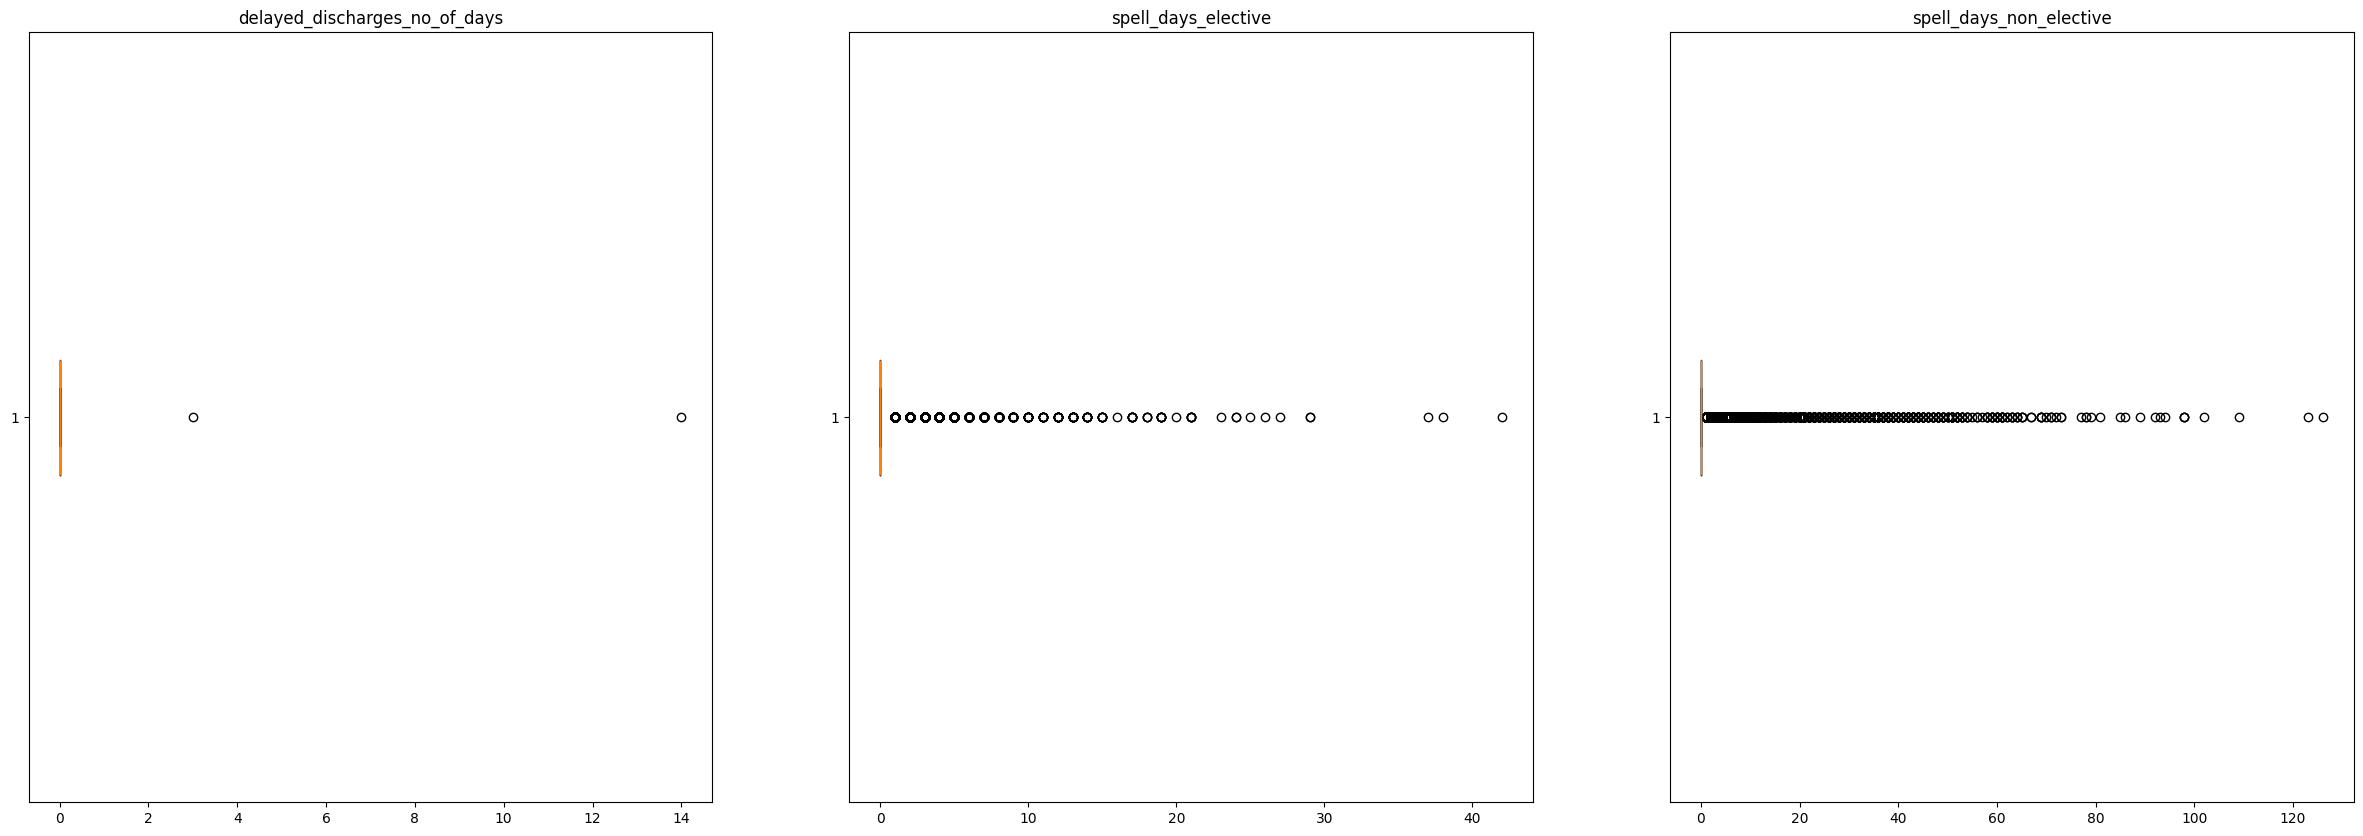

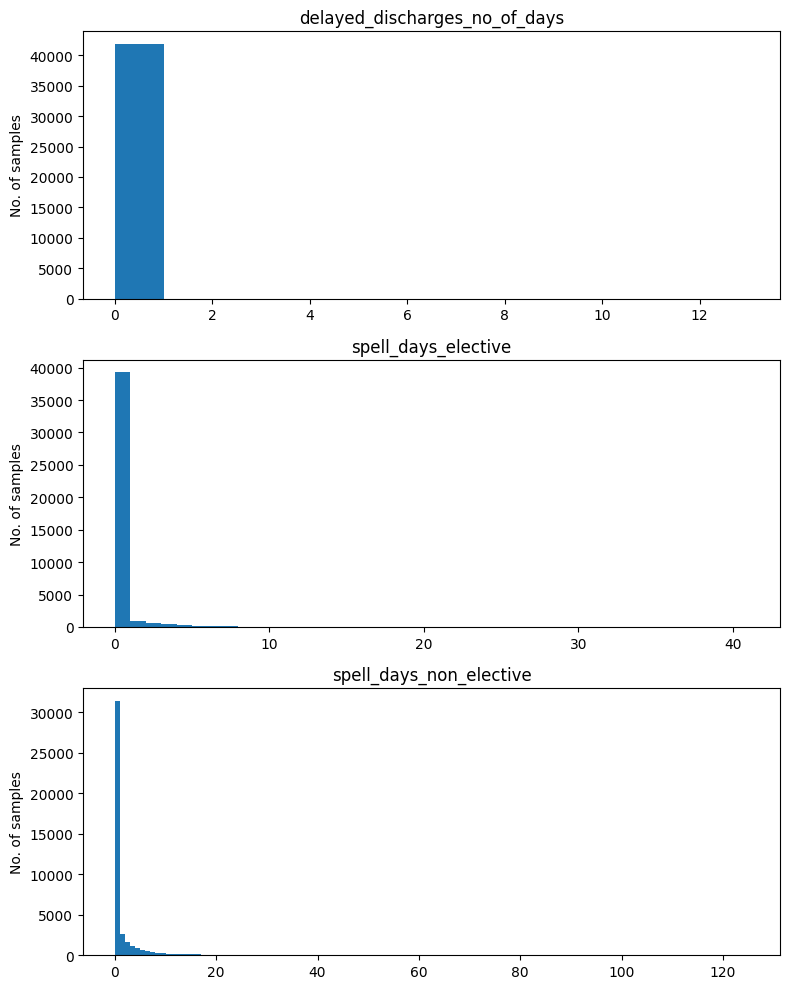

In [246]:
qual_cols = df_trimmed[["delayed_discharges_no_of_days", "spell_days_elective", "spell_days_non_elective"]]
titles = ["delayed_discharges_no_of_days", "spell_days_elective", "spell_days_non_elective"]

plt.figure(figsize=(30,10))

for fig_num, title in enumerate(titles):
    plt.subplot(1, 3, fig_num+1)
    plt.boxplot(qual_cols.loc[:,title], vert=False)
    plt.title(title)

plt.figure(figsize=(8,10))

for fig_num, title in enumerate(titles):
    plt.subplot(3, 1, fig_num+1)
    plt.hist(qual_cols.loc[:,title],bins=np.arange(min(qual_cols.loc[:,title]), max(qual_cols.loc[:,title])))
    plt.title(title)
    plt.ylabel("No. of samples")

plt.savefig('/Users/issandungu/Desktop/MSc Artificial Intelligence/Assignments/SCC450/Outputs/Plots/Outlier Detection - Boxplots.png')
plt.tight_layout()
plt.show()


* **"delayed_discharge_no_of_days"** has two outliers - 3 & 14. Rest of values are 0 (zero days).
* **"spell_days_elective"** appears to have multiple outliers, since 39,000+ values are zero (data is heavily skewed).
* **"spell_days_non_elective** appears to also have multiple outliers, since 31,000+ values are zero (data is heavily skewed).

Column Deleted (below) -
* **'delayed_discharges_no_of_days'** - since its variance is very low; almost entirely full of zeros

In [247]:
df_trimmed = df_trimmed.drop('delayed_discharges_no_of_days', axis=1)

No need to remove outliers since tree-based models are robust to them, but will manually verify skewed data to ensure it is valid

In [248]:
df[["spell_days_elective", "spell_days_non_elective"]].describe(percentiles=[.99])

,spell_days_elective,spell_days_non_elective
count,41846.000000,41846.000000
mean,0.193256,1.684366
std,1.112569,5.618371
min,0.000000,0.000000
50%,0.000000,0.000000
99%,5.000000,28.000000
max,42.000000,126.000000


---

3. Feature Engineering

* Encoding

_One-hot Encoding_

Columns encoded (below):
* **"specialty_division"**
* **"speciality_directorate"**

Preferred method - One-hot encoding (despite the increase in dimensionality, there is no risk of false ordinality, & it works well for linear & non-linear models.

In [249]:
df_trimmed = pd.get_dummies(df_trimmed, columns=["specialty_division"], prefix="spec_div")
df_trimmed = pd.get_dummies(df_trimmed, columns=["specialty_directorate"], prefix="spec_direc")

_CatBoost Encoding_

Target variable needed for this method, so have added our target variable column to the end of the dataset (for encoding purposes only)

In [250]:
df_trimmed

,spell_dominant_proc,spell_primary_diagnosis,spell_secondary_diagnosis,hrg_group,hrg_sub_group,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,spell_days_elective,spell_days_non_elective,sex_national_code,spec_div_Medicine,spec_div_Specialist Services,spec_div_Surgery,spec_direc_Medicine,spec_direc_Specialist Services,spec_direc_Surgery,spec_direc_Womens Health
0,Record not grouped,K573,I10X,Digestive System,Record not grouped,0,0,0,0,0,2,False,False,True,False,False,True,False
1,W901,T845,B957,Vascular Procedures and Disorders and Imaging ...,Record not grouped,0,0,0,0,0,1,False,True,False,False,True,False,False
2,Record not grouped,K650,K573,Digestive System,Record not grouped,1,1,0,0,0,1,False,False,True,False,False,True,False
3,B284,C504,I10X,"Skin, Breast and Burns",Breast Procedures and Disorders,0,0,0,0,0,2,False,False,True,False,False,True,False
4,G451,K227,K317,Digestive System,Record not grouped,0,0,0,0,0,2,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41841,Record not grouped,Record not grouped,Record not grouped,Undefined Groups,Undefined Groups,0,0,0,0,0,1,False,True,False,False,True,False,False
41842,Record not grouped,Record not grouped,Record not grouped,Undefined Groups,Undefined Groups,0,0,0,0,0,2,True,False,False,True,False,False,False
41843,Record not grouped,Record not grouped,Record not grouped,Undefined Groups,Undefined Groups,0,0,0,0,0,1,False,False,True,False,False,True,False
41844,Record not grouped,Record not grouped,Record not grouped,Undefined Groups,Undefined Groups,0,0,0,0,0,2,False,True,False,False,True,False,False


Columns encoded (below):
* Spell_dominant_proc
* spell_primary_diagnosis
* spell_secondary_diagnosis
* hrg_group
* hrg_sub_group

Risk of CatBoost Encoding - target leakage (since the model will see the associated target variable of each category). So k-folds will be used to perform 'OUT OF FOLD' target encoding

In [251]:
from category_encoders import CatBoostEncoder
from sklearn.model_selection import KFold

# Append target column to the end of the split dataset (col 20-40):
df_trimmed["spell_episode_los"] = df["spell_episode_los"]

# Target variable
target = df_trimmed["spell_episode_los"]
# Columns to be encoded:
col_to_encode = ["spell_dominant_proc",
                "spell_primary_diagnosis",
                "spell_secondary_diagnosis",
                "hrg_group",
                "hrg_sub_group"]
# Define number of folds
k_folds = KFold(n_splits=5, shuffle=True, random_state=98)

# Create a copy to preserve original data (if needed in the future)
df_trimmed_encoded = df_trimmed.copy()

# Loops through column names to be encoded
for col in col_to_encode:

    # Placeholder - OOF values
    oof_values = pd.Series(index=df_trimmed.index, dtype=float)

    # OOF encoding per column:
    for tr_index, val_index in k_folds.split(df_trimmed):
        encoder = CatBoostEncoder(cols=[col],a=20.0)
        encoder.fit(df_trimmed.iloc[tr_index][[col]], target.iloc[tr_index])
        oof_values.iloc[val_index] = encoder.transform(df_trimmed.iloc[val_index][[col]])[col]

    df_trimmed_encoded[col + "_encoded"] = oof_values
    # Add frequency count
    freq = df_trimmed[col].map(df[col].value_counts())
    df_trimmed_encoded[col + "_count"] = freq

    # Adds 'rare flag' column (to indicate if the category is rare - useful to the model's performance)
    df_trimmed_encoded[col + "_is_rare"] = (freq < 10).astype(int)

In [252]:
df_trimmed_encoded.head(5)

,spell_dominant_proc,spell_primary_diagnosis,spell_secondary_diagnosis,hrg_group,hrg_sub_group,readmission_flag_28_days,readmission_flag_30_days,inpatient_death_flag,spell_days_elective,spell_days_non_elective,...,spell_primary_diagnosis_is_rare,spell_secondary_diagnosis_encoded,spell_secondary_diagnosis_count,spell_secondary_diagnosis_is_rare,hrg_group_encoded,hrg_group_count,hrg_group_is_rare,hrg_sub_group_encoded,hrg_sub_group_count,hrg_sub_group_is_rare
0,Record not grouped,K573,I10X,Digestive System,Record not grouped,0,0,0,0,0,...,0,0.481789,1706,0,1.050894,8117,0,1.568200,16630,0
1,W901,T845,B957,Vascular Procedures and Disorders and Imaging ...,Record not grouped,0,0,0,0,0,...,0,4.281060,18,0,1.869293,703,0,1.598684,16630,0
2,Record not grouped,K650,K573,Digestive System,Record not grouped,1,1,0,0,0,...,0,0.491774,390,0,1.017811,8117,0,1.557619,16630,0
3,B284,C504,I10X,"Skin, Breast and Burns",Breast Procedures and Disorders,0,0,0,0,0,...,0,0.573372,1706,0,0.950269,1891,0,0.343803,328,0
4,G451,K227,K317,Digestive System,Record not grouped,0,0,0,0,0,...,0,0.429772,105,0,1.053234,8117,0,1.598684,16630,0


Reorder columns

In [253]:
ordered_colnames = ['spell_dominant_proc', 'spell_dominant_proc_encoded', 'spell_dominant_proc_count',
       'spell_dominant_proc_is_rare','spell_primary_diagnosis','spell_primary_diagnosis_encoded',
       'spell_primary_diagnosis_count', 'spell_primary_diagnosis_is_rare',
       'spell_secondary_diagnosis', 'spell_secondary_diagnosis_encoded', 'spell_secondary_diagnosis_count',
       'spell_secondary_diagnosis_is_rare','hrg_group','hrg_group_encoded',
       'hrg_group_count', 'hrg_group_is_rare', 'hrg_sub_group', 'hrg_sub_group_encoded',
       'hrg_sub_group_count', 'hrg_sub_group_is_rare', 'readmission_flag_28_days',
       'readmission_flag_30_days', 'inpatient_death_flag',
       'spell_days_elective', 'spell_days_non_elective', 'sex_national_code',
       'spec_div_Medicine', 'spec_div_Specialist Services', 'spec_div_Surgery',
       'spec_direc_Medicine', 'spec_direc_Specialist Services',
       'spec_direc_Surgery', 'spec_direc_Womens Health', 'spell_episode_los']

df_trimmed_encoded = df_trimmed_encoded[ordered_colnames]
# Copy
df_cleaned_21to40 = df_trimmed_encoded.copy()

-----

**Final View (encoded + cleaned variables)**

In [254]:
df_cleaned_21to40.head(15)

,spell_dominant_proc,spell_dominant_proc_encoded,spell_dominant_proc_count,spell_dominant_proc_is_rare,spell_primary_diagnosis,spell_primary_diagnosis_encoded,spell_primary_diagnosis_count,spell_primary_diagnosis_is_rare,spell_secondary_diagnosis,spell_secondary_diagnosis_encoded,...,spell_days_non_elective,sex_national_code,spec_div_Medicine,spec_div_Specialist Services,spec_div_Surgery,spec_direc_Medicine,spec_direc_Specialist Services,spec_direc_Surgery,spec_direc_Womens Health,spell_episode_los
0,Record not grouped,2.095972,17781,0,K573,0.346762,483,0,I10X,0.481789,...,0,2,False,False,True,False,False,True,False,0
1,W901,1.471375,222,0,T845,5.090934,80,0,B957,4.281060,...,0,1,False,True,False,False,True,False,False,0
2,Record not grouped,2.075228,17781,0,K650,2.321897,23,0,K573,0.491774,...,0,1,False,False,True,False,False,True,False,0
3,B284,1.039977,21,0,C504,0.717953,49,0,I10X,0.573372,...,0,2,False,False,True,False,False,True,False,0
4,G451,0.332463,1490,0,K227,0.334606,239,0,K317,0.429772,...,0,2,True,False,False,True,False,False,False,0
5,G459,1.259447,588,0,K922,0.780828,192,0,D649,2.433064,...,4,2,True,False,False,True,False,False,False,4
6,Record not grouped,2.132128,17781,0,D529,1.307432,9,1,K746,1.694055,...,0,2,True,False,False,True,False,False,False,0
7,Record not grouped,2.115982,17781,0,G442,0.955654,24,0,I678,2.624664,...,0,2,True,False,False,True,False,False,False,0
8,G451,0.393019,1490,0,K227,0.217207,239,0,K296,0.669420,...,0,1,True,False,False,True,False,False,False,0
9,Record not grouped,2.056191,17781,0,S3200,3.757638,19,0,X500,2.386457,...,2,2,False,True,False,False,True,False,False,2
